# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Import Packages

In [2]:
# Package Import
import numpy as np
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import cv2
import csv 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Preprocess Data
from sklearn.utils import shuffle

# Load pickled data
import pickle

import random
import math

---
## Step 0: Load The Data

In [3]:
training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p' 

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# Shape of an traffic sign image?
image_shape = X_train[0].shape

# Number of unique classes/labels in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [51]:
label = {}
with open('signnames.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader, None)
    for row in reader:
        label[int(row[0])] = row[1]

### Training Dataset

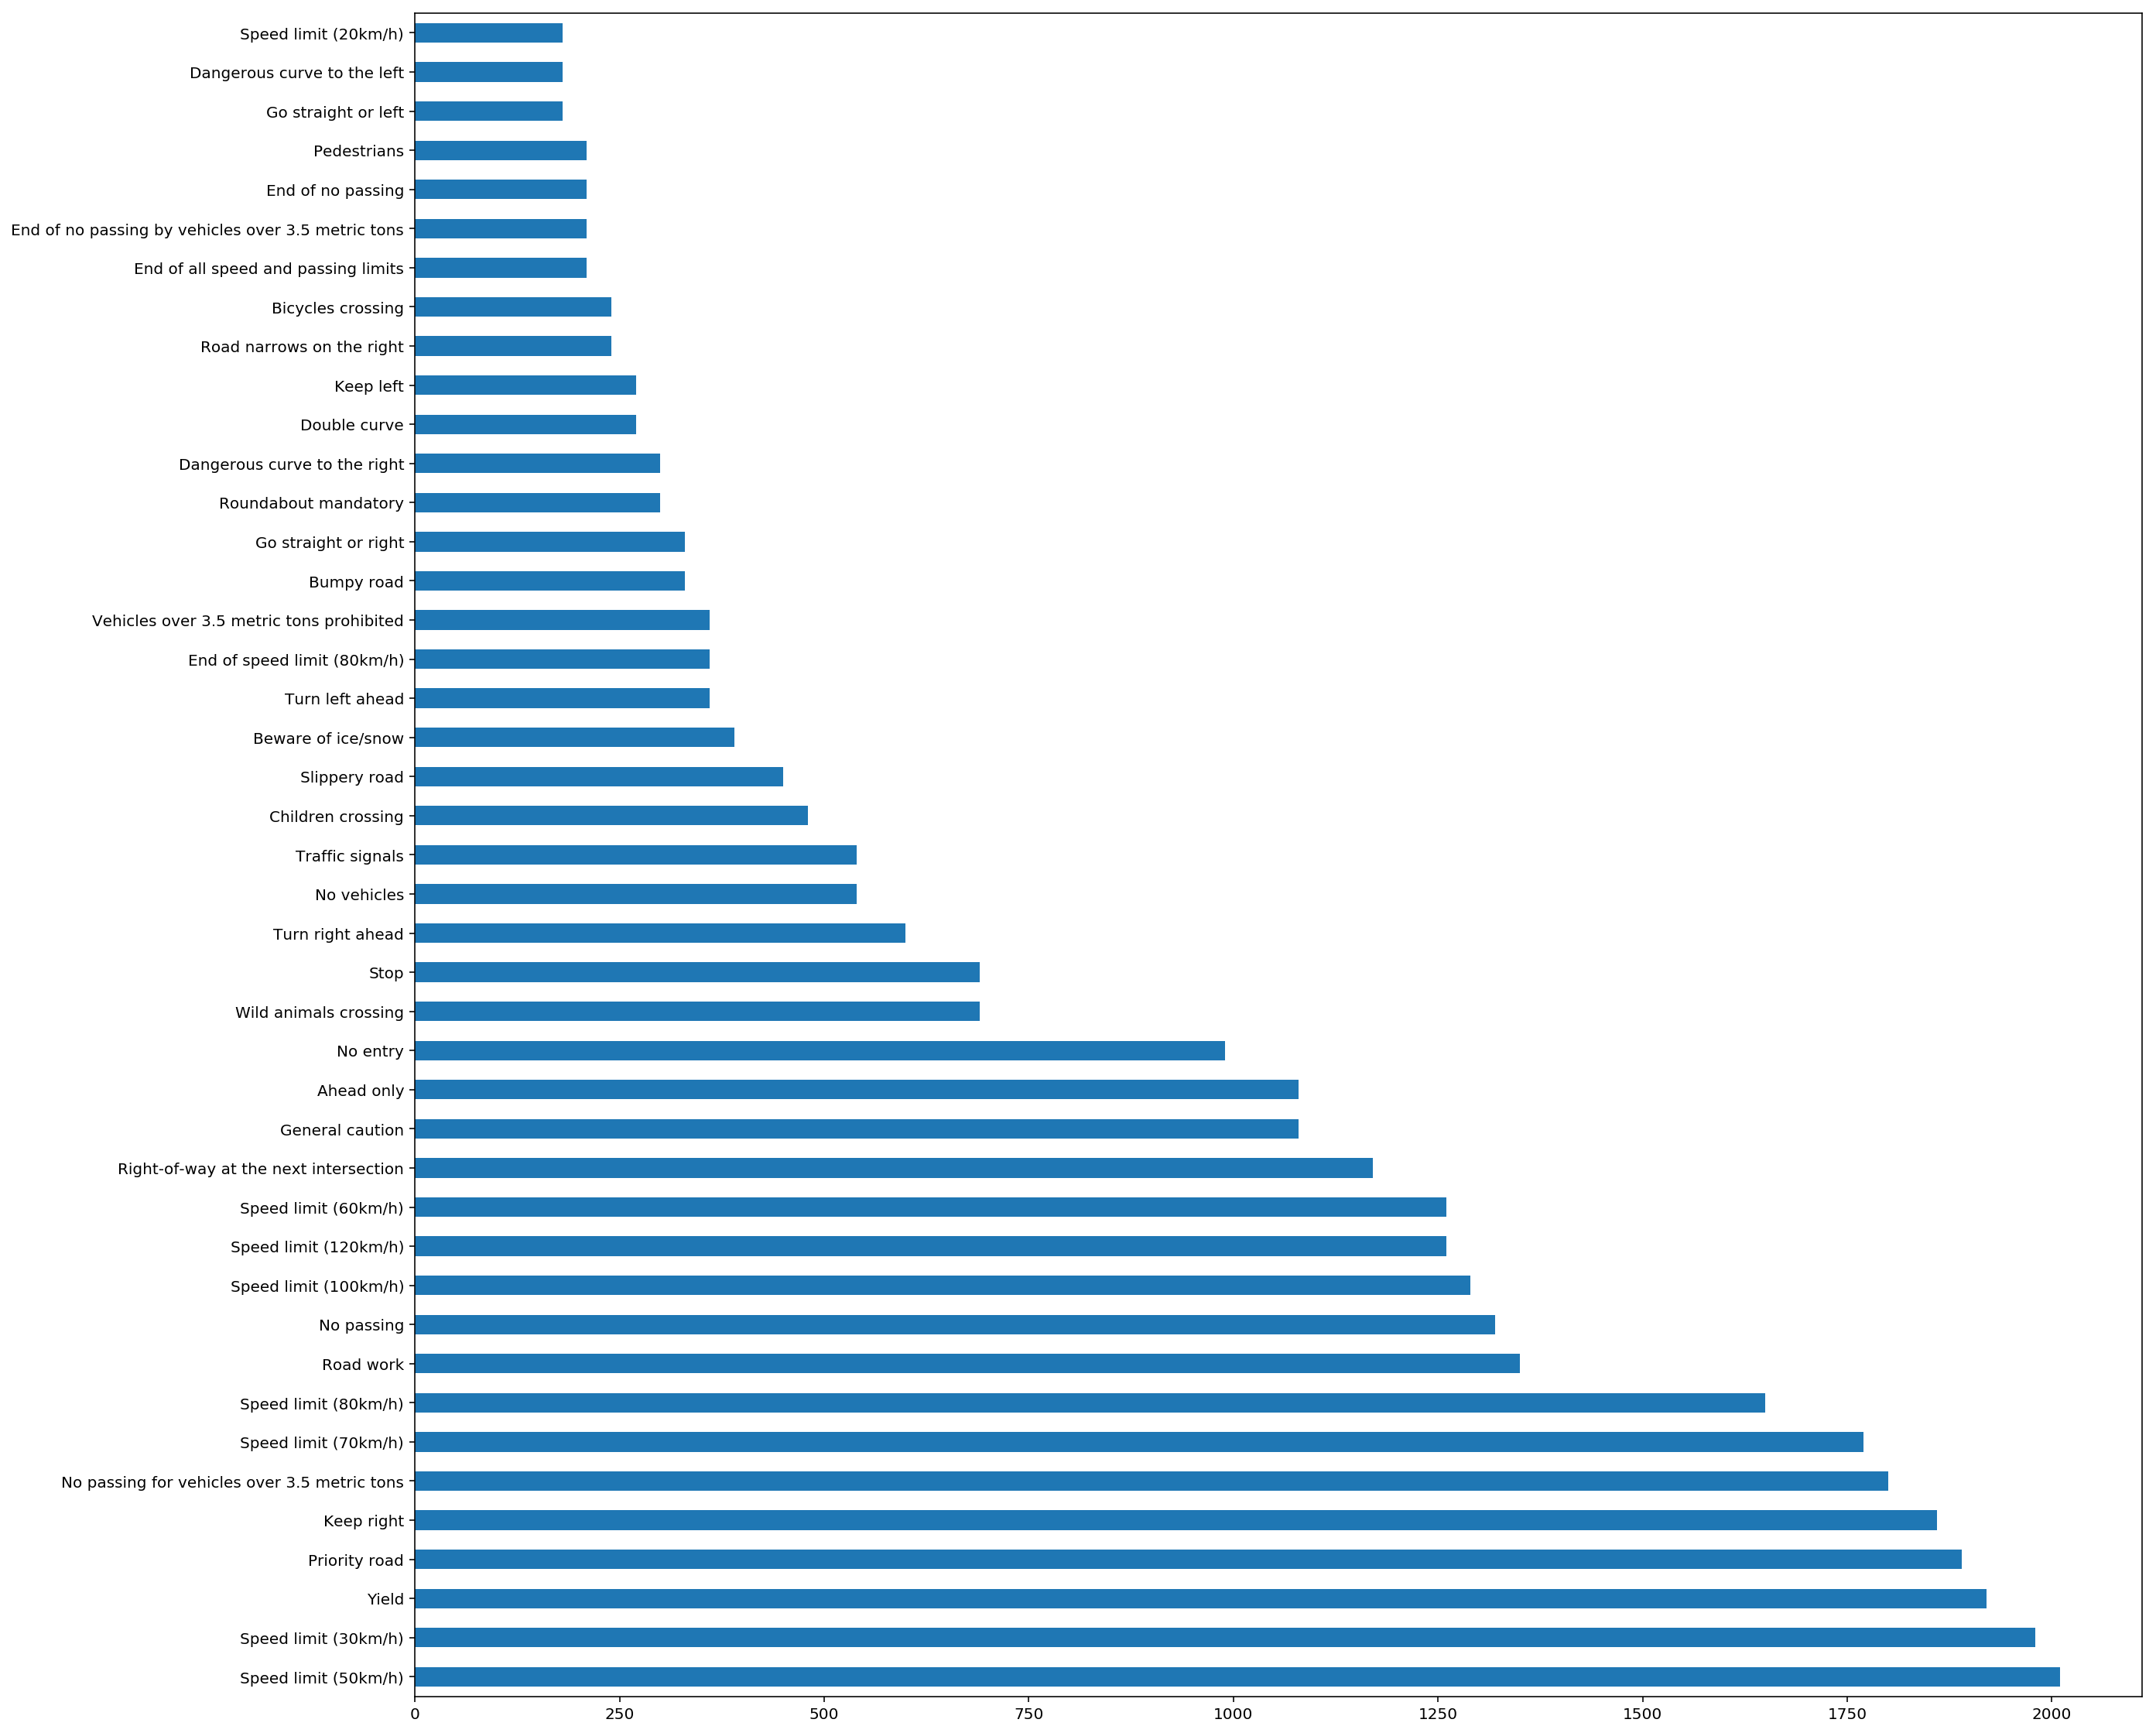

In [53]:
y_train_dataframe = pd.DataFrame()
y_train_dataframe['label'] = y_train

train_fig = plt.figure(figsize=(20,20))
train_ax = fig.add_subplot(111)
train_ax = y_train_dataframe['label'].value_counts().plot.barh()
train_ax.set_yticklabels(list(map(lambda x: label[x], y_train_dataframe['label'].value_counts().index.tolist())), 
                            rotation = 'horizontal') 
plt.show()

### Validation Dataset

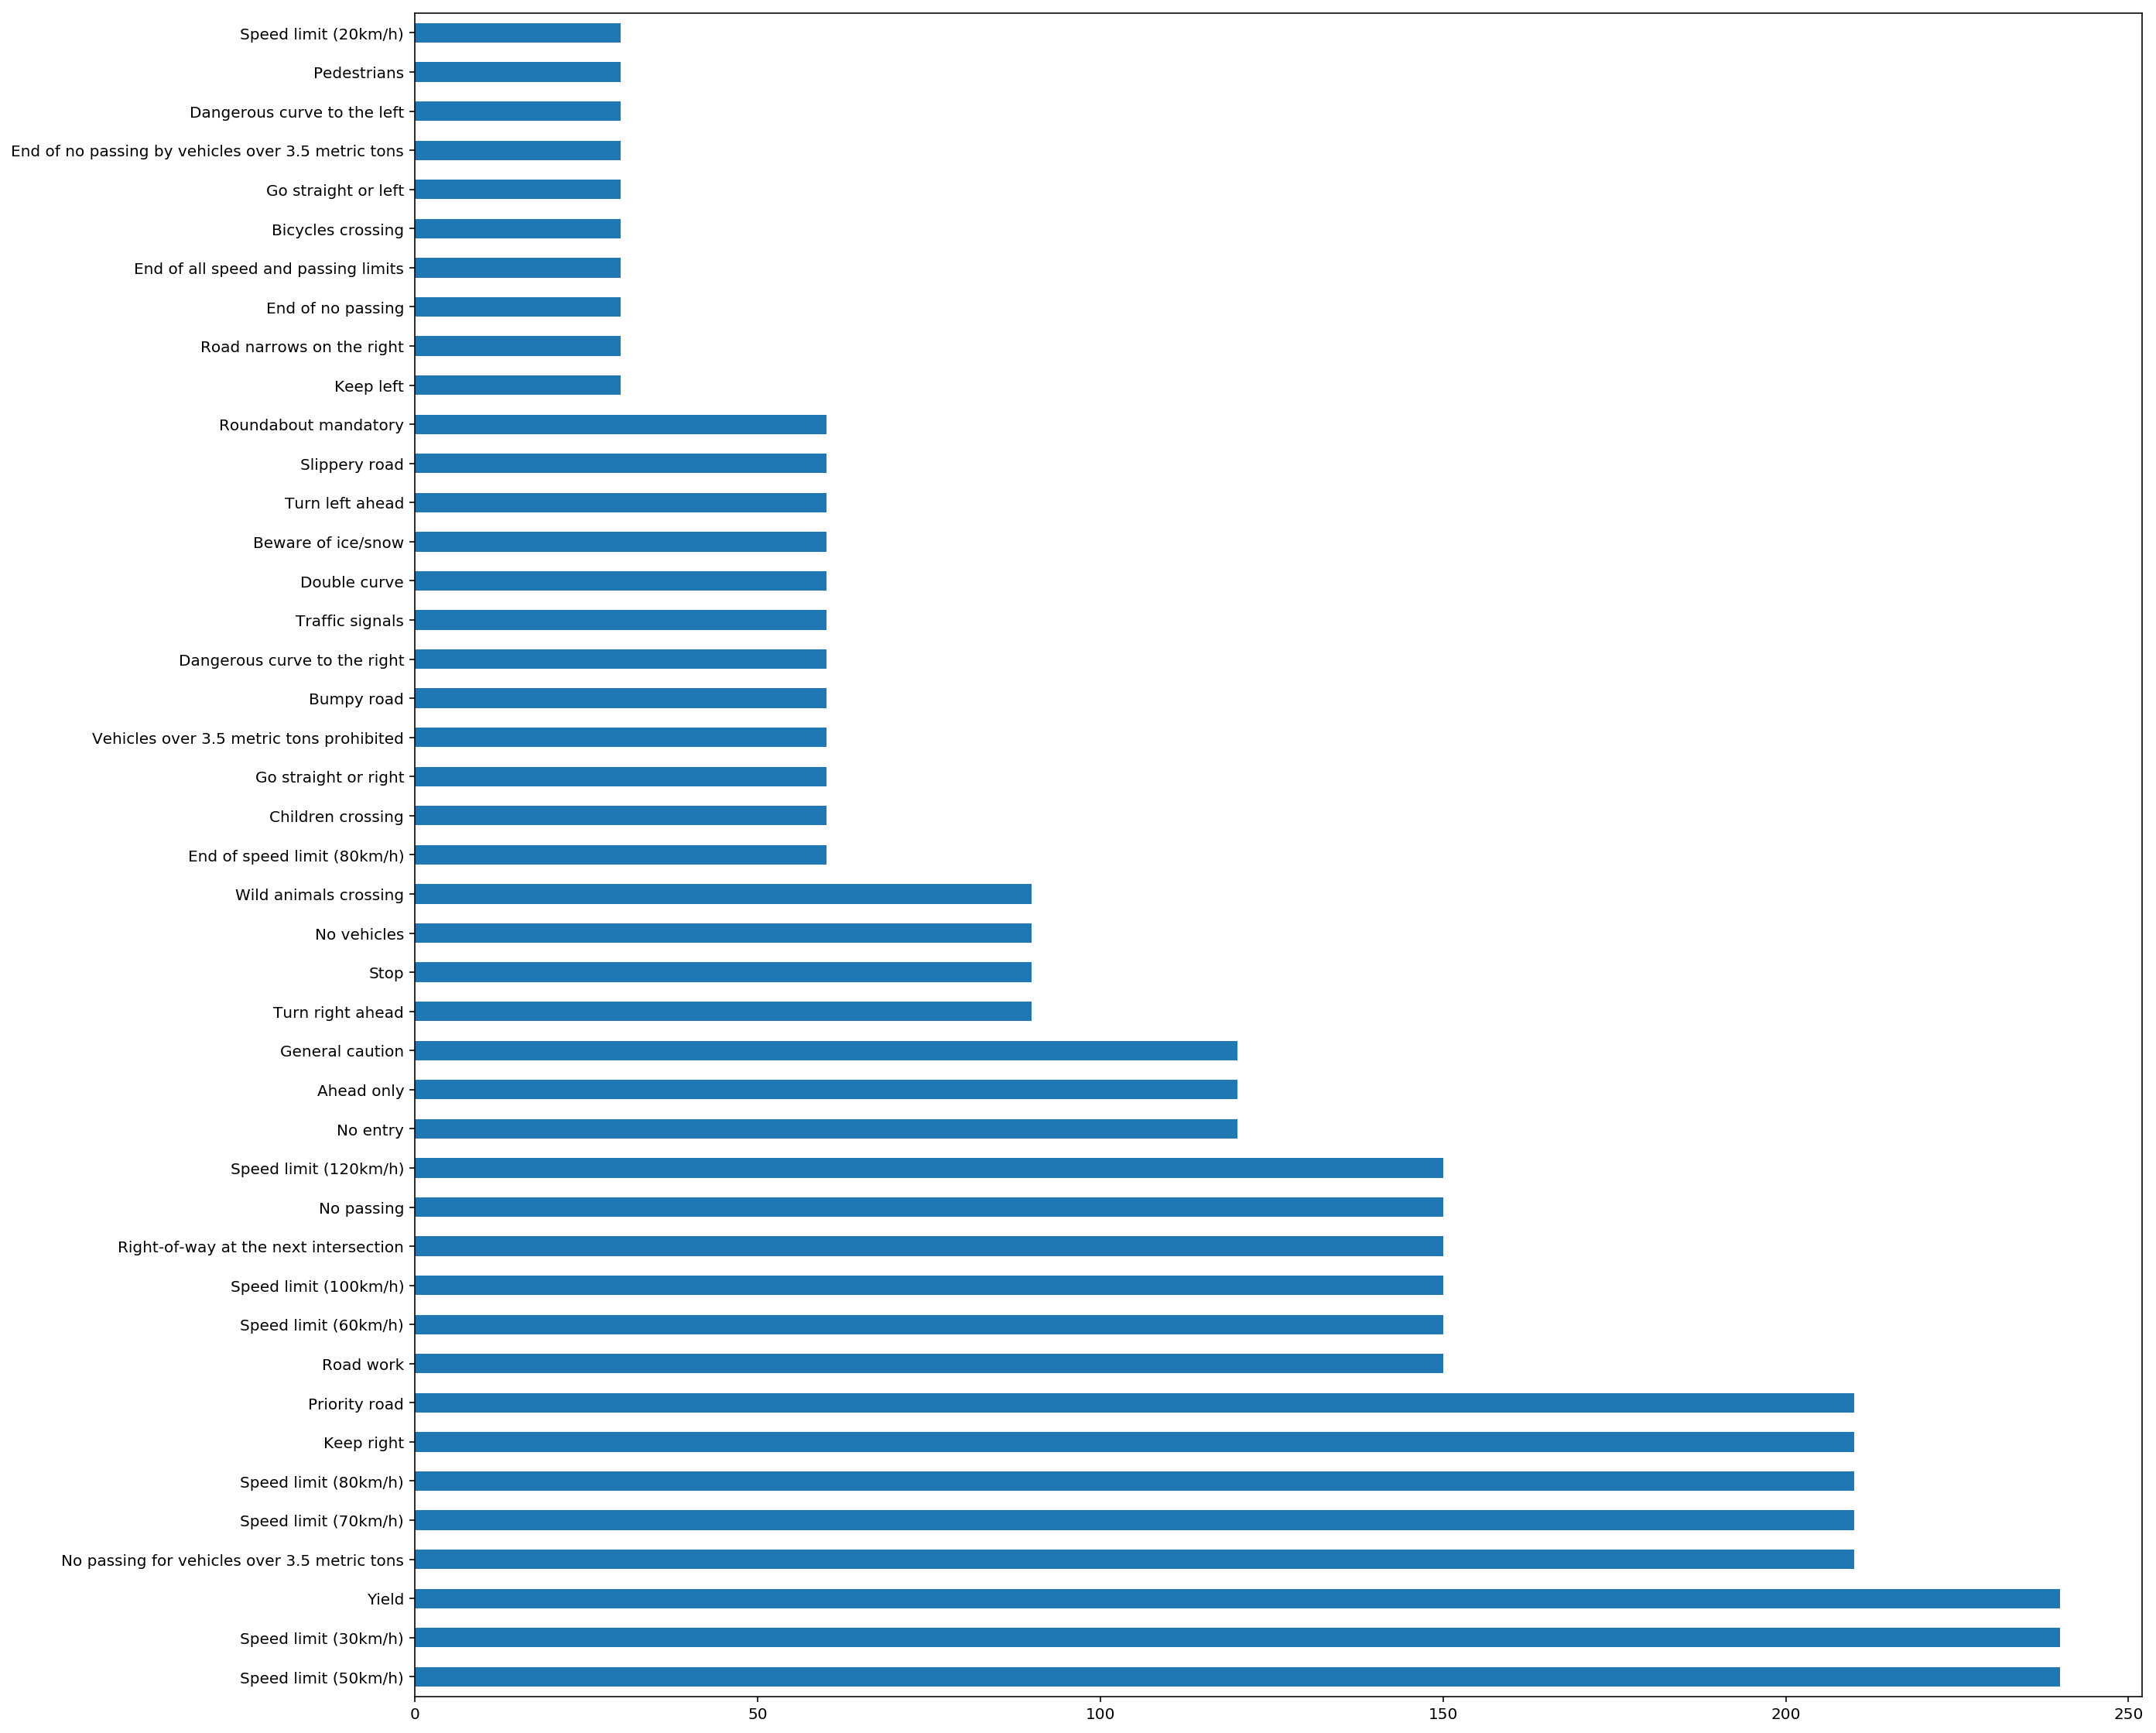

In [55]:
y_valid_dataframe = pd.DataFrame()
y_valid_dataframe['label'] = y_valid

valid_fig = plt.figure(figsize=(20,20))
valid_ax = fig.add_subplot(111)
valid_ax = y_valid_dataframe['label'].value_counts().plot.barh()
valid_ax.set_yticklabels(list(map(lambda x: label[x], y_valid_dataframe['label'].value_counts().index.tolist())), 
                            rotation = 'horizontal') 
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
def normalize_grayscale(image_data):
    """
    This function is used to normalize the input image.
    The input 'image_data' should be a grayscaled image.
    """
    return (image_data - 128)/128

In [5]:
def image_preprocess(img):
    """
    This function is used to preprocess the images used to train the neural network.
    The input 'img' should be a colored image.
    """    
    # Transform RGB images to Grayscale 
    img_gray = np.sum(img/3, axis = 3, keepdims = True)
    
    # Normalize grayscale data
    img_gray_norm = normalize_grayscale(img_gray)  
          
    return img_gray_norm  

### Image preprocessing example

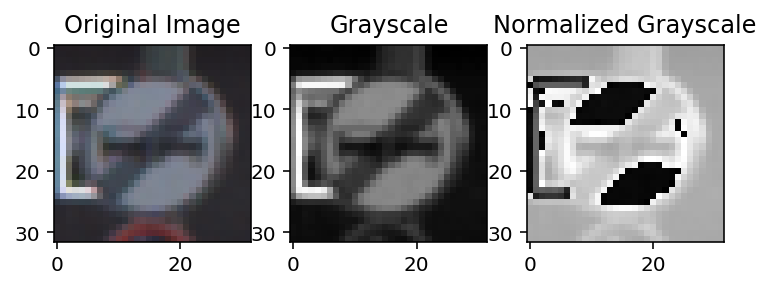

In [6]:
rand_image = X_train[111]  # random image
gray_image = cv2.cvtColor(rand_image, cv2.COLOR_BGR2GRAY)
gray_norm_image = normalize_grayscale(gray_image)

# Show Original vs. Grayscale vs. Normalized Grayscale Images
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.set_aspect('equal')
ax1.imshow(rand_image)
ax1.set_title('Original Image')
ax2.imshow(gray_image, cmap='gray')
ax2.set_title('Grayscale')
ax3.imshow(gray_norm_image, cmap='gray')
ax3.set_title('Normalized Grayscale')
plt.show()

## Augmenting the dataset - from [Vivek Yadav](https://medium.com/@vivek.yadav/improved-performance-of-deep-learning-neural-network-models-on-traffic-sign-classification-using-6355346da2dc)

In [59]:
def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness  
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

### Image augmentation example

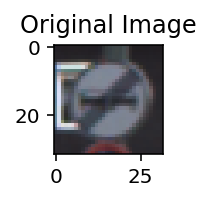

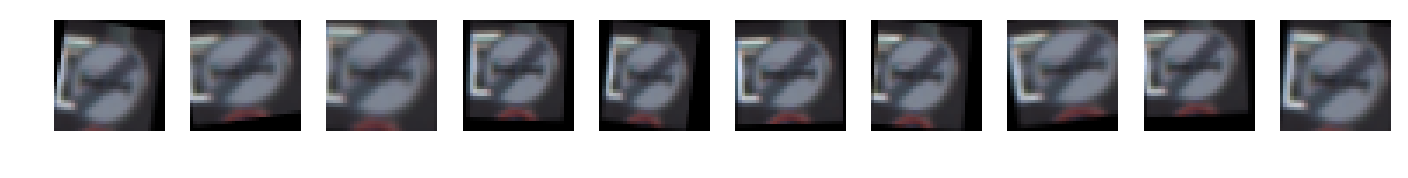

In [81]:
rand_image = X_train[111]  # random image
plt.figure(figsize=(1,1))
plt.title('Original Image')
plt.imshow(rand_image)

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02)  
plt.figure(figsize=(12,12))
#plt.suptitle('Set of Augmented Images')
for i in range(10):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = transform_image(rand_image,10,5,5)

    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

# Preprocess Pipeline Functions

In [9]:
def augment_set(X_set,Y_set,sample_nr): 
    """
    This function is used to augment the training set with distorted samples of img 
    'nr' is the number of extra samples to be added for each original image
    """        
    ang_range = 10
    shear_range = 5
    trans_range = 5
    
    X_set_list = X_set.tolist()
    Y_set_list = Y_set.tolist()
    
    # Data augmentation
    for i_set in range(len(X_set_list)):
        for i_snr in range(sample_nr[Y_set[i_set]]):
            X_set_list.append(transform_image(X_set[i_set],ang_range,shear_range,trans_range))
            Y_set_list.append(Y_set[i_set])
            
    return np.array(X_set_list, dtype = np.float32()), np.array(Y_set_list, dtype = np.float32())

# Preprocess Pipeline

Due to big difference in the amount of data in each unique label, I decided to augment each one with a different number of samples. The following rule has been used.

In [24]:
y_train_ratio = []
unique, counts = np.unique(y_train, return_counts=True)
counts_list = counts.tolist()

for i in counts_list:
    y_train_ratio.append(int((max(counts_list))/(1.5*i))+1)

print(y_train_ratio)

[8, 1, 1, 2, 1, 1, 4, 2, 2, 2, 1, 2, 1, 1, 2, 3, 4, 2, 2, 8, 5, 5, 5, 3, 6, 1, 3, 7, 3, 6, 4, 2, 7, 3, 4, 2, 5, 8, 1, 5, 5, 7, 7]


In [25]:
# Augment X_train set
X_train_augmented, Y_train_augmented = augment_set(X_train,y_train,y_train_ratio)

# Transform all RGB images to Normalized Grayscale 
X_train_norm_gray = image_preprocess(X_train_augmented)
X_valid_norm_gray = image_preprocess(X_valid)
X_test_norm_gray = image_preprocess(X_test)

### Model Architecture

In [27]:
EPOCHS = 50 
BATCH_SIZE = 256
tf.reset_default_graph()

In [28]:
### NN Architecture.
from tensorflow.contrib.layers import flatten

def MyNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1a: Convolutional. Input = 32x32x1. Output = 28x28x6.
    F_W_1a = tf.Variable(tf.truncated_normal(shape = (5, 5, 1, 6), mean = mu, stddev = sigma))
    F_b_1a = tf.Variable(tf.zeros(6))
    strides_1a = [1, 1, 1, 1]
    padding_1a = 'VALID'
    out_layer1a = tf.nn.conv2d(x, F_W_1a, strides_1a, padding_1a) + F_b_1a
    
    # Layer 1b: Convolutional. Input = 28x28x6. Output = 24x24x12.
    F_W_1b = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 12), mean = mu, stddev = sigma))
    F_b_1b = tf.Variable(tf.zeros(12))
    strides_1b = [1, 1, 1, 1]
    padding_1b = 'VALID'
    out_layer1b = tf.nn.conv2d(out_layer1a, F_W_1b, strides_1b, padding_1b) + F_b_1b

    # Activation.
    out_layer1_activation = tf.nn.relu(out_layer1b)

    # Pooling. Input = 24x24x12. Output = 12x12x12.
    out_layer1_pooling = tf.nn.max_pool(out_layer1_activation, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # Layer 2a: Convolutional. Input = 12x12x12. Output = 8x8x18.
    F_W_2a = tf.Variable(tf.truncated_normal(shape = (5, 5, 12, 18), mean = mu, stddev = sigma))
    F_b_2a = tf.Variable(tf.zeros(18))
    strides_2a = [1, 1, 1, 1]
    padding_2a = 'VALID'
    out_layer2a = tf.nn.conv2d(out_layer1_pooling, F_W_2a, strides_2a, padding_2a) + F_b_2a
    
    # Layer 2b: Convolutional. Input 8x8x18. Output = 4x4x24.
    F_W_2b = tf.Variable(tf.truncated_normal(shape = (5, 5, 18, 24), mean = mu, stddev = sigma))
    F_b_2b = tf.Variable(tf.zeros(24))
    strides_2b = [1, 1, 1, 1]
    padding_2b = 'VALID'
    out_layer2b = tf.nn.conv2d(out_layer2a, F_W_2b, strides_2b, padding_2b) + F_b_2b
    
    # Activation.
    out_layer2_activation = tf.nn.relu(out_layer2b)

    # Pooling. Input = 4x4x24. Output = 2x2x24.
    out_layer2_pooling = tf.nn.max_pool(out_layer2_activation, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # Flatten. Input = 2x2x24. Output = 96.
    out_layer2_flatten = flatten(out_layer2_pooling)
    
    # Layer 3: Fully Connected. Input = 96. Output = 64.
    F_W_3 = tf.Variable(tf.truncated_normal(shape = (96, 64), mean = mu, stddev = sigma))
    F_b_3 = tf.Variable(tf.zeros(64))
    out_layer3 = tf.matmul(out_layer2_flatten, F_W_3) + F_b_3
    
    # Activation.
    out_layer3_activation = tf.nn.relu(out_layer3)

    # Layer 4: Fully Connected. Input = 64. Output = 43.
    F_W_4 = tf.Variable(tf.truncated_normal(shape = (64, 43), mean = mu, stddev = sigma))
    F_b_4 = tf.Variable(tf.zeros(43))
    out_layer4 = tf.matmul(out_layer3_activation, F_W_4) + F_b_4
    
    logits = out_layer4
    
    return logits

In [29]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

## Training Pipeline

In [30]:
rate = 0.00075 

logits = MyNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation

In [31]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model

In [32]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm_gray)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_norm_gray, Y_train_augmented = shuffle(X_train_norm_gray, Y_train_augmented)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm_gray[offset:end], Y_train_augmented[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_norm_gray, y_valid)
        training_accuracy = evaluate(X_train_norm_gray, Y_train_augmented)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.738
Validation Accuracy = 0.837

EPOCH 2 ...
Training Accuracy = 0.843
Validation Accuracy = 0.902

EPOCH 3 ...
Training Accuracy = 0.880
Validation Accuracy = 0.921

EPOCH 4 ...
Training Accuracy = 0.907
Validation Accuracy = 0.927

EPOCH 5 ...
Training Accuracy = 0.923
Validation Accuracy = 0.943

EPOCH 6 ...
Training Accuracy = 0.929
Validation Accuracy = 0.941

EPOCH 7 ...
Training Accuracy = 0.939
Validation Accuracy = 0.944

EPOCH 8 ...
Training Accuracy = 0.948
Validation Accuracy = 0.948

EPOCH 9 ...
Training Accuracy = 0.957
Validation Accuracy = 0.957

EPOCH 10 ...
Training Accuracy = 0.961
Validation Accuracy = 0.961

EPOCH 11 ...
Training Accuracy = 0.958
Validation Accuracy = 0.947

EPOCH 12 ...
Training Accuracy = 0.968
Validation Accuracy = 0.956

EPOCH 13 ...
Training Accuracy = 0.966
Validation Accuracy = 0.955

EPOCH 14 ...
Training Accuracy = 0.965
Validation Accuracy = 0.955

EPOCH 15 ...
Training Accuracy = 0.972
Valid

## Evaluate the Model

In [33]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(X_test_norm_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.947


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['3_SpeedLimit60kmh.jpg', '25_RoadWork.jpg', '28_ChildrenCrossing.jpg', '38_KeepRight.jpg', '14_Stop.jpg', '18_GeneralCaution.jpg', '22_BumpyRoad.jpg', '11_RightOfWay.jpg', '17_NoEntry.jpg']


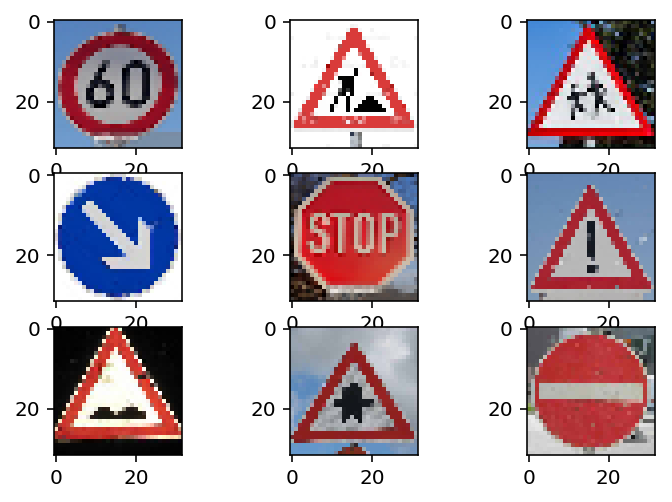

In [34]:
import os
figlist = [f for f in os.listdir('German-Traffic-Signs-Test/') if not f.startswith('.')]
print(figlist)

plot_col_nr = 3
plot_row_nr = len(figlist)/plot_col_nr
fig_i = 0

test_figs = []

for fig in figlist:
    fig_i += 1
    image = mpimg.imread(str('German-traffic-signs-test/'+fig))
    image_resize = cv2.resize(image,(32,32),interpolation = cv2.INTER_CUBIC)
    test_figs.append(image_resize)
    plt.subplot(plot_row_nr,plot_col_nr,fig_i)
    plt.imshow(image_resize)

test_figs = np.asarray(test_figs)

### Predict the Sign Type for Each Image

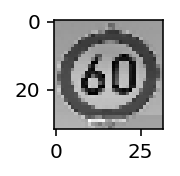

Predicted label =  3 --> Speed limit (60km/h)


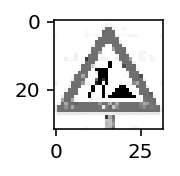

Predicted label =  25 --> Road work


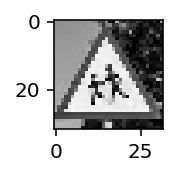

Predicted label =  28 --> Children crossing


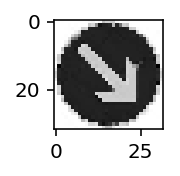

Predicted label =  38 --> Keep right


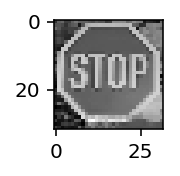

Predicted label =  14 --> Stop


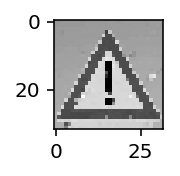

Predicted label =  18 --> General caution


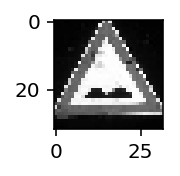

Predicted label =  22 --> Bumpy road


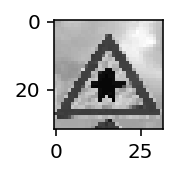

Predicted label =  11 --> Right-of-way at the next intersection


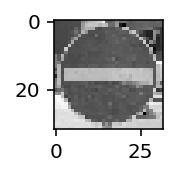

Predicted label =  17 --> No entry


In [35]:
out_test_labels = []

my_X_test_norm_gray = image_preprocess(test_figs)
      
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))   
    print("==========================================================")
    for x_test in my_X_test_norm_gray:
        out_label_idx = sess.run(tf.argmax(logits,1), feed_dict={x: x_test.reshape([-1, 32, 32, 1])}) 
        out_test_labels.append(out_label_idx[0])
        plt.figure(figsize=(1,1))
        plt.imshow(x_test.reshape(32,32), cmap='gray')
        plt.show()
        print("Predicted label = ", out_label_idx[0],"-->", label[out_label_idx[0]])
        print("==========================================================")

### Analyze Performance

In [36]:
my_test_labels = [3, 25, 28, 38, 14, 18, 22, 11, 17]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(my_X_test_norm_gray, my_test_labels)
    print("Test Accuracy = ", test_accuracy*100, "%")

Test Accuracy =  100.0 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

PREDICTED TRAFFIC SIGNS


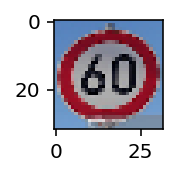

Speed limit (60km/h) , with possibility 100.000 %
Speed limit (20km/h) , with possibility 0.000 %
Speed limit (30km/h) , with possibility 0.000 %
Speed limit (50km/h) , with possibility 0.000 %
Speed limit (70km/h) , with possibility 0.000 %


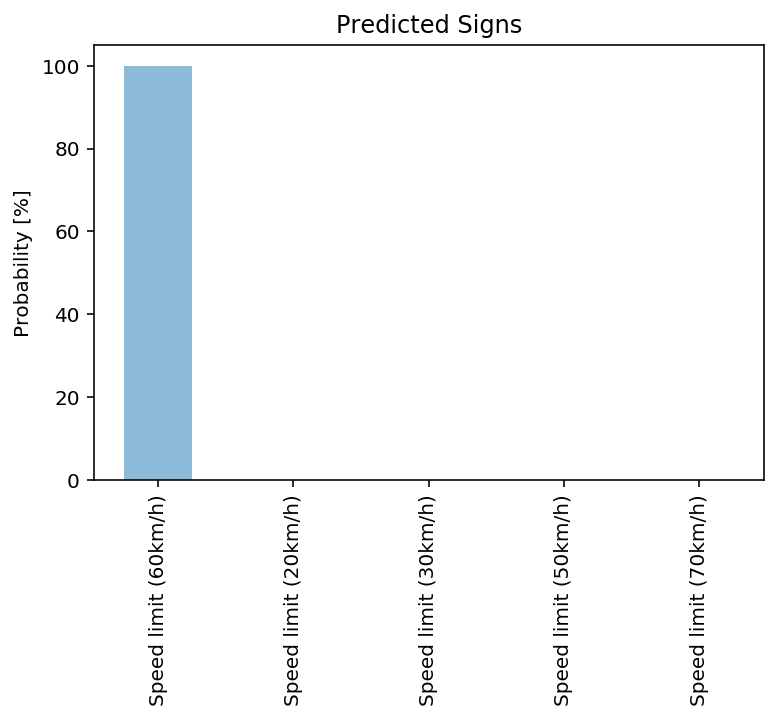

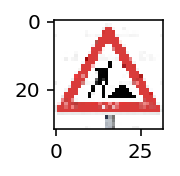

Road work , with possibility 100.000 %
Dangerous curve to the right , with possibility 0.000 %
Beware of ice/snow , with possibility 0.000 %
Slippery road , with possibility 0.000 %
Right-of-way at the next intersection , with possibility 0.000 %


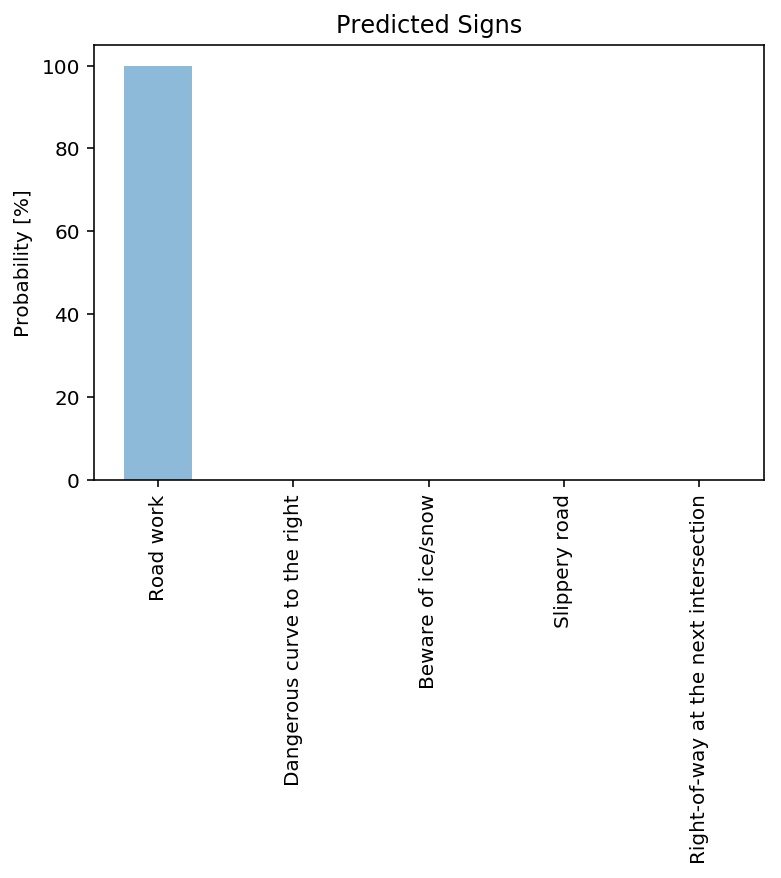

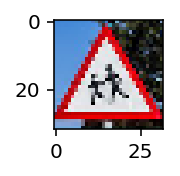

Children crossing , with possibility 100.000 %
Road narrows on the right , with possibility 0.000 %
Beware of ice/snow , with possibility 0.000 %
Right-of-way at the next intersection , with possibility 0.000 %
Pedestrians , with possibility 0.000 %


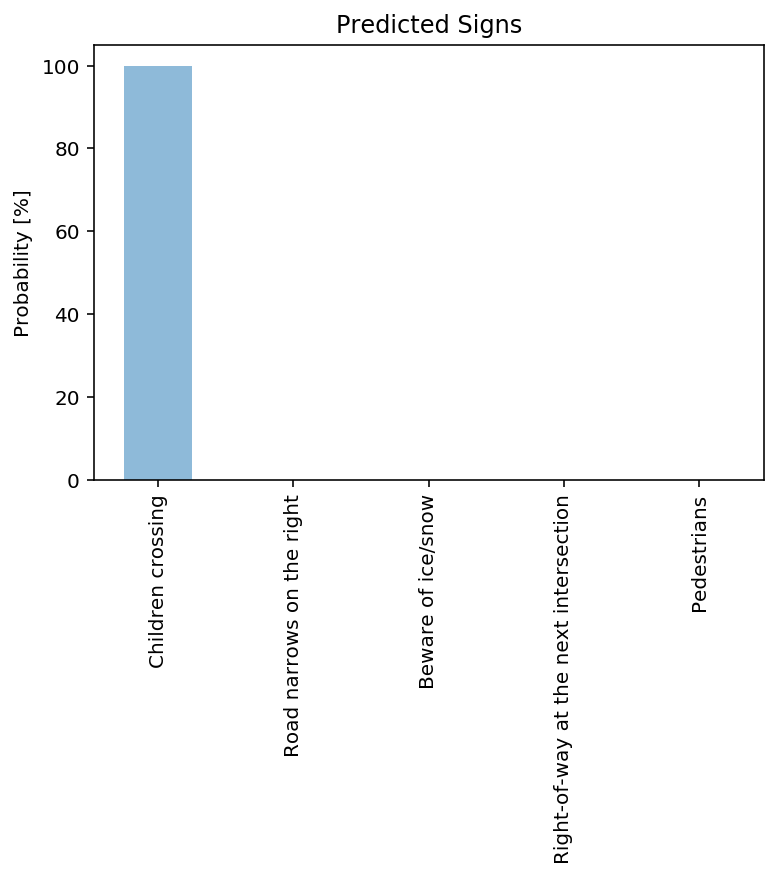

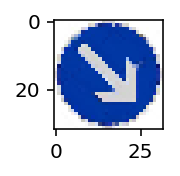

Keep right , with possibility 100.000 %
No passing for vehicles over 3.5 metric tons , with possibility 0.000 %
Priority road , with possibility 0.000 %
Slippery road , with possibility 0.000 %
No passing , with possibility 0.000 %


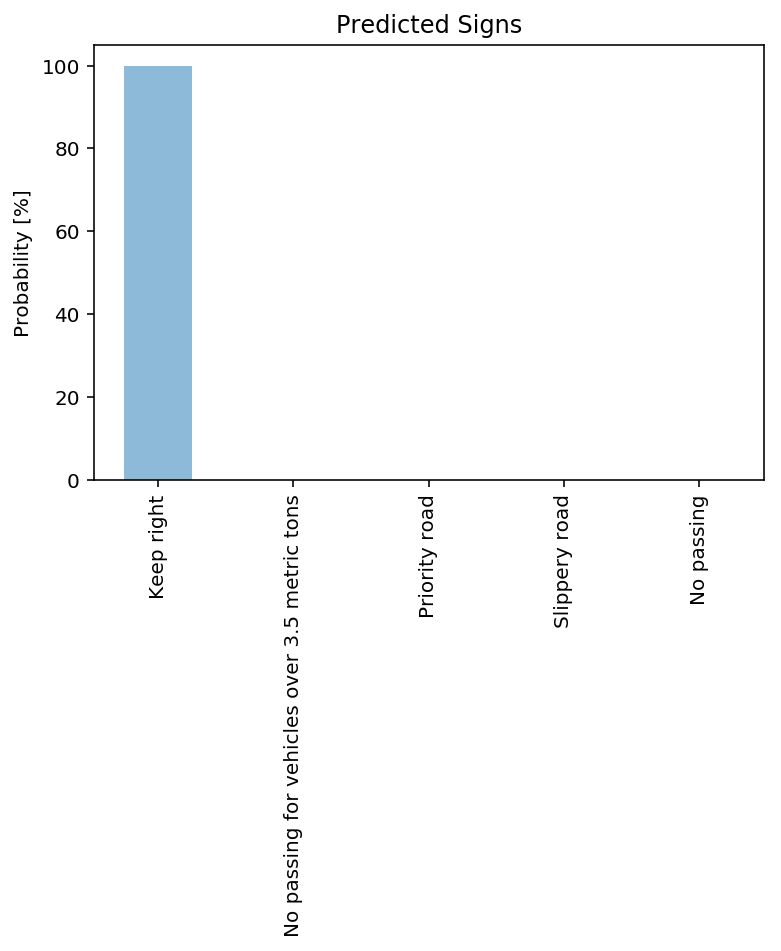

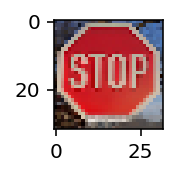

Stop , with possibility 100.000 %
Speed limit (60km/h) , with possibility 0.000 %
Speed limit (70km/h) , with possibility 0.000 %
Speed limit (80km/h) , with possibility 0.000 %
Speed limit (30km/h) , with possibility 0.000 %


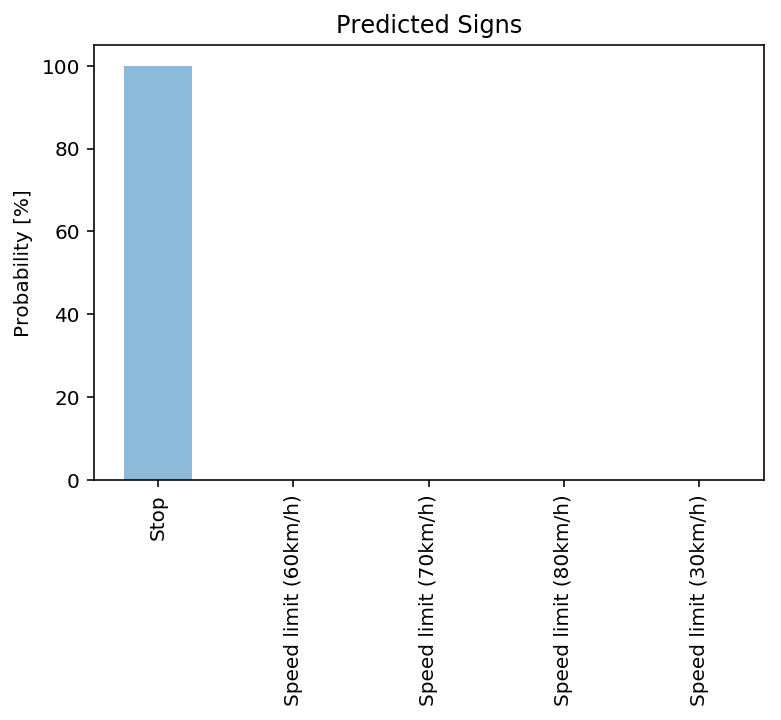

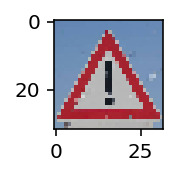

General caution , with possibility 100.000 %
Speed limit (20km/h) , with possibility 0.000 %
Speed limit (30km/h) , with possibility 0.000 %
Speed limit (50km/h) , with possibility 0.000 %
Speed limit (60km/h) , with possibility 0.000 %


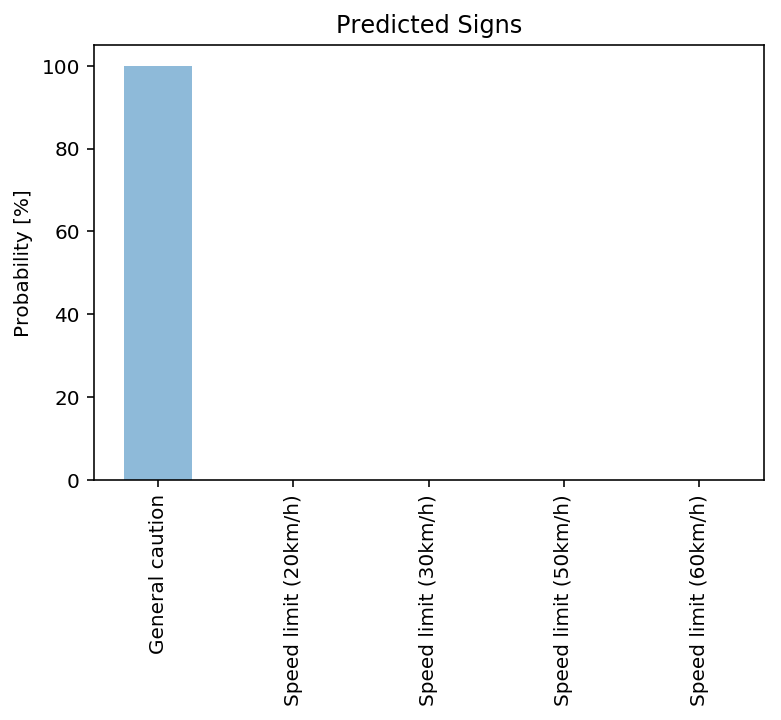

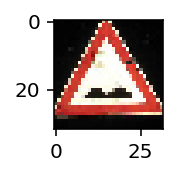

Bumpy road , with possibility 100.000 %
Wild animals crossing , with possibility 0.000 %
Bicycles crossing , with possibility 0.000 %
Speed limit (20km/h) , with possibility 0.000 %
Speed limit (30km/h) , with possibility 0.000 %


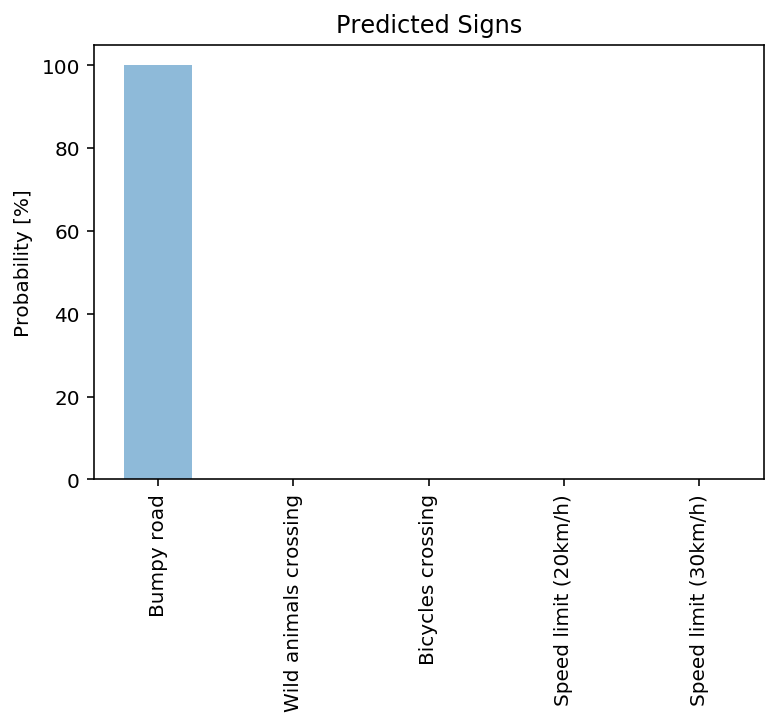

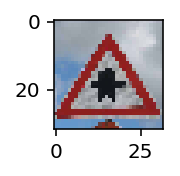

Right-of-way at the next intersection , with possibility 100.000 %
Beware of ice/snow , with possibility 0.000 %
Speed limit (20km/h) , with possibility 0.000 %
Speed limit (30km/h) , with possibility 0.000 %
Speed limit (50km/h) , with possibility 0.000 %


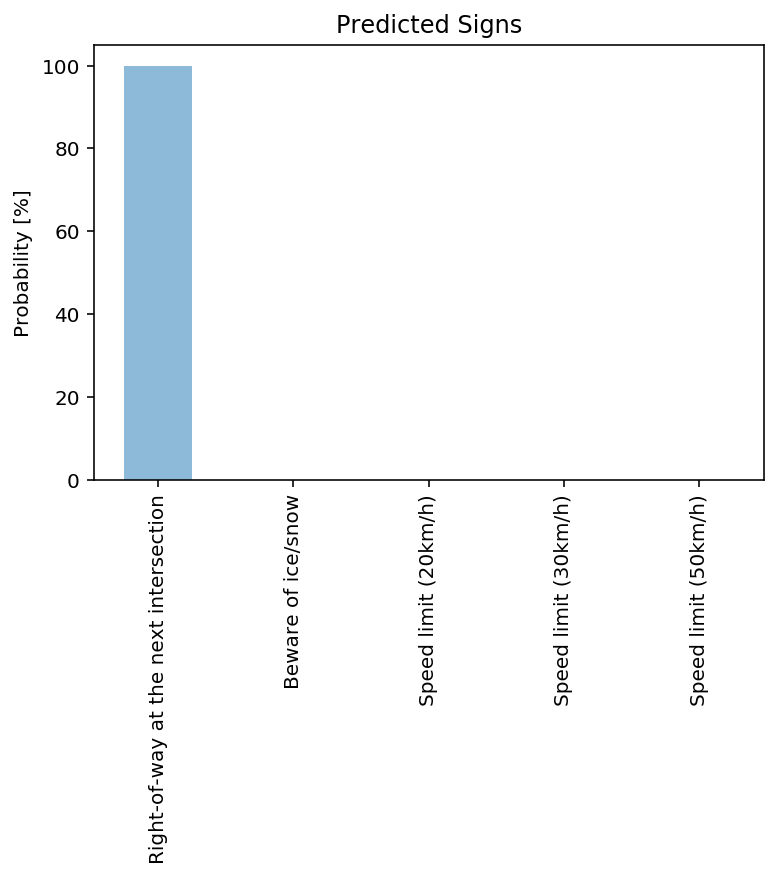

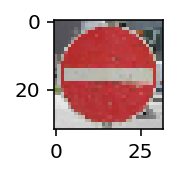

No entry , with possibility 100.000 %
Turn left ahead , with possibility 0.000 %
Go straight or left , with possibility 0.000 %
Ahead only , with possibility 0.000 %
No passing , with possibility 0.000 %


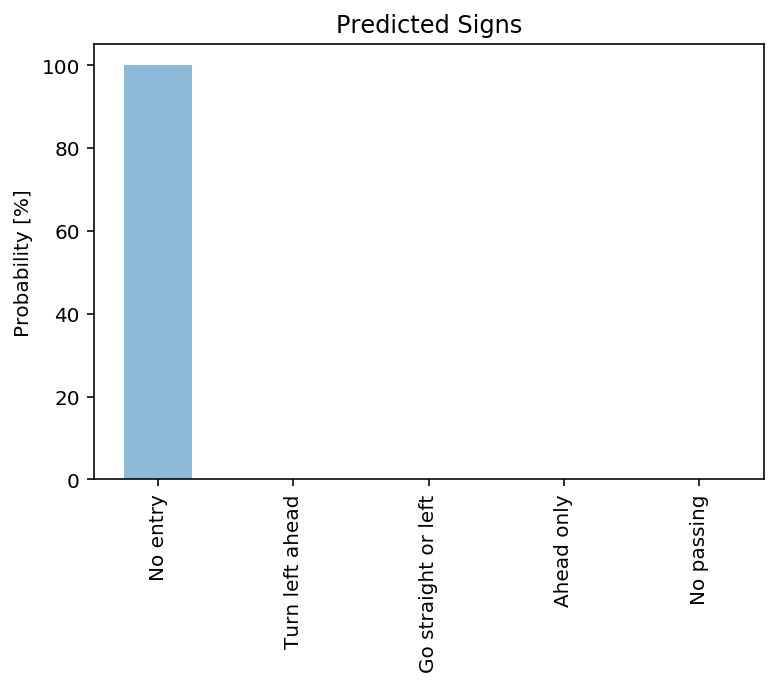

In [37]:
# Top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
prob_nr = 5
objects = []

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))   
    
    out_logits = sess.run(tf.nn.softmax(logits), feed_dict={x: my_X_test_norm_gray}) 
    top = sess.run(tf.nn.top_k(tf.constant(out_logits), k=prob_nr))
    
    print("==========================================================")
    print("PREDICTED TRAFFIC SIGNS")
    print("==========================================================")
    for im_i in range(len(test_figs)):
        plt.figure(figsize=(1,1))
        plt.imshow(test_figs[im_i])
        plt.show()
        for k_i in range(prob_nr):
            print(label[top.indices[im_i][k_i]],', with possibility {:.3f}'.format(top.values[im_i][k_i]*100), '%' )
            objects.append(label[top.indices[im_i][k_i]])
        y_pos = np.arange(prob_nr)
        posibilities = top.values[im_i]*100        
        plt.bar(y_pos, posibilities, align='center', alpha=0.5, width = 0.5)
        plt.xticks(y_pos, objects, rotation = 'vertical')
        plt.ylabel('Probability [%]')
        plt.title('Predicted Signs')
        plt.show()
        objects.clear()
        print("==========================================================")
        

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")